# Class 12

In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier as Clf
from sklearn.linear_model import LinearRegression 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder as le

from pandas.core.dtypes.common import is_numeric_dtype
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/kaggle/input/data-visualizatiion/insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

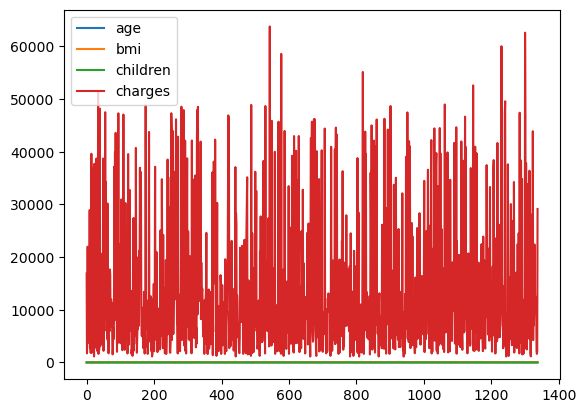

In [7]:
df.plot()

## Label Encoding

In [8]:
le = le()
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=le.fit_transform(df[column])

## Split Dataset

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,1,0,27.900,0,1,3,16884.92400
1,0,1,33.770,1,0,2,1725.55230
2,10,1,33.000,3,0,2,4449.46200
3,15,1,22.705,0,0,1,21984.47061
4,14,1,28.880,0,0,1,3866.85520


In [10]:
x = df.drop(['charges'],axis=1)
y = df['charges']

In [11]:
x.head()

,age,sex,bmi,children,smoker,region
0,1,0,27.900,0,1,3
1,0,1,33.770,1,0,2
2,10,1,33.000,3,0,2
3,15,1,22.705,0,0,1
4,14,1,28.880,0,0,1


In [12]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [13]:
# train test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.30,random_state=1)

## Linear Regression

In [14]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [15]:
y_pred = reg.predict(xtest)

In [16]:
y_pred

array([ 4.50048433e+03,  1.28194579e+04,  1.23977127e+04,  1.34303433e+04,
        5.31776110e+02,  3.22642696e+04,  1.30762461e+04,  1.22348298e+04,
        3.82932402e+03,  3.01565286e+04,  1.13198257e+04,  1.72084618e+04,
        8.91832075e+03,  8.22883518e+03,  3.58166904e+03,  1.01918742e+04,
        3.97134424e+03,  6.75521017e+03,  1.52141457e+04,  1.42498228e+04,
        1.24184207e+04,  3.34497470e+04,  9.12417099e+03,  8.85380484e+03,
        3.13406481e+03,  8.14417612e+03,  9.33914668e+03,  1.10793027e+04,
        7.54531559e+03,  4.40537383e+03,  1.39112972e+04,  5.64886526e+03,
        3.46827850e+04,  2.74022377e+04,  3.38105315e+04,  9.52560370e+03,
        3.06087668e+04,  2.67066855e+04,  1.54113111e+04,  3.41398489e+04,
        6.63468968e+03,  1.39736793e+04,  1.08971678e+04,  1.47980620e+04,
        4.09741953e+03,  1.29622798e+04,  4.71597335e+03,  2.92771692e+04,
        7.31791501e+03,  1.39529721e+04,  1.35190763e+04,  1.20798653e+04,
        2.00264361e+03,  

In [17]:
reg.score(xtest,ytest)

0.7403677168975319